# Hierarchical clustering

[Curso de Clustering con Python y scikit-learn](https://platzi.com/cursos/clustering)

## Importar librerías

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs # datos artificiales para clusteres
from sklearn.cluster import AgglomerativeClustering # algoritmo de clustering jerarquico aglomerativo
from sklearn.metrics import silhouette_score # coeficiente de silueta
from scipy.cluster.hierarchy import dendrogram, linkage # dendograma y calculo de ditancias

## Preparando datos de prueba

Vamos a generar un conjunto de datos artificial con estructuras de cluster, organizado en dos dataframes 

In [7]:
# datos de ejemplo con estructura de cluster
X,y, c = make_blobs(500, cluster_std=0.9, centers=4, n_features=2,return_centers=True)

# datos generados para entrenamiento y viualizacion
df_blobs = pd.DataFrame(
    {
        'x1': X[:,0],
        'x2': X[:,1],
        'y': y,
    }
)

# coordenadas de los centros reales de los clusteres
df_centers = pd.DataFrame(
    {
        'x1': c[:,0],
        'x2': c[:,1],
    }
)

## Visualización de datos

Visualizamos los clusteres de los datos generados

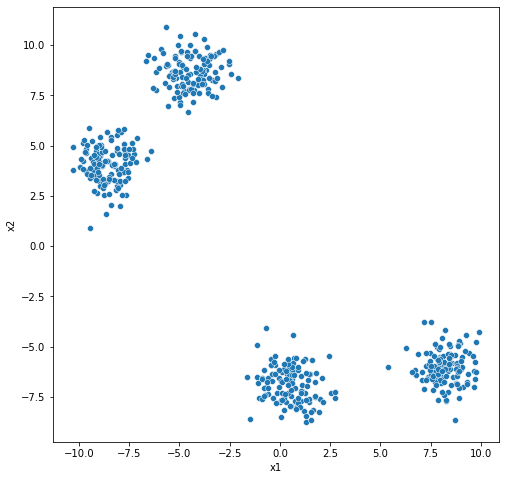

In [8]:
fig = plt.figure(figsize=(8,8))
sns.scatterplot(data=df_blobs, x='x1', y='x2')
plt.show()

## Dendrograma y hierarchical clustering

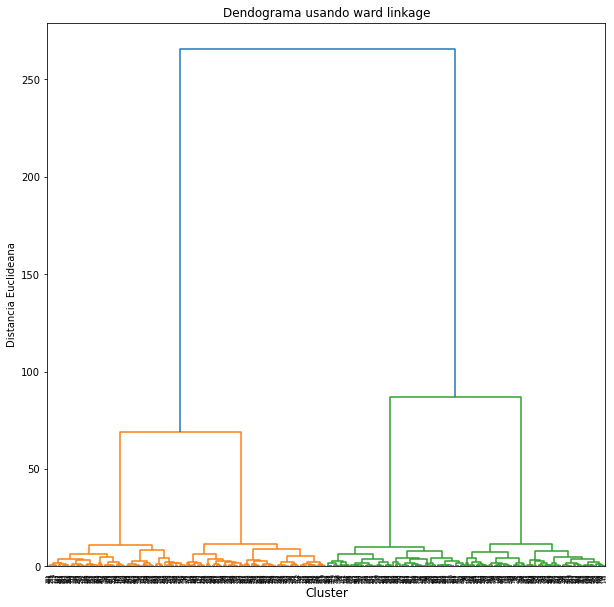

In [9]:
fig = plt.figure(figsize=(10,10))
dendograma_plot = dendrogram(linkage(X, method='ward'))
plt.title('Dendograma usando ward linkage')
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Distancia Euclideana')
plt.show()

> La grafica muestra claramente que se pueden formar 3 o 4 clusteres debido a su amplia separacion.

Ahora, vamos aplicar el modelo aglomerativo a los , usando la cantidad de clusteres optima seleccionada a partir del dendograma, que en este caso es 4

In [10]:
# definicion del modelo
hc = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')

# prediccion del modelo
y_hc = hc.fit_predict(X)

/home/jbernal/anaconda3/envs/data/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Una vez obtenida las predicciones del modelo, la agregamos al df_blobs

In [11]:
df_blobs['cluter'] = y_hc
df_blobs

,x1,x2,y,cluter
0,8.920893,-7.578004,2,2
1,9.709479,-5.763978,2,2
2,-3.386651,8.267287,3,1
3,0.599198,-6.603491,1,0
4,8.458632,-4.961465,2,2
...,...,...,...,...
495,-6.572003,9.532254,3,1
496,9.278045,-4.439364,2,2
497,6.554178,-6.270881,2,2
498,-8.016952,3.573825,0,3


Ahora visualizamos los datos junto a los cluster predichos por el modelo

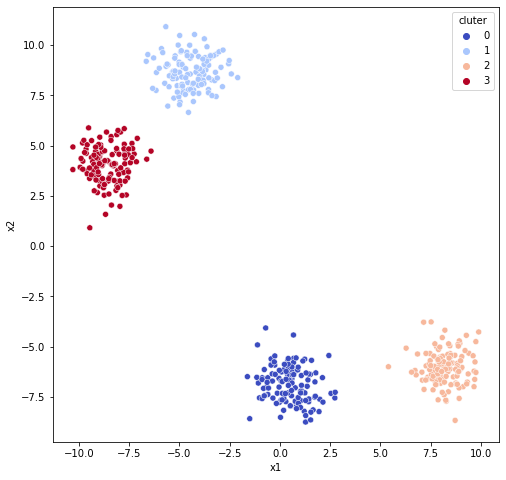

In [12]:
fig = plt.figure(figsize=(8,8))
sns.scatterplot(data=df_blobs, x='x1', y='x2', hue='cluter', palette='coolwarm')
plt.show()

> El algoritmo usa la distancia mas cercana para aglomerar los clusteres que tambien puede viualizarse en el dendograma.

## Evaluación de hierarchical clustering

In [13]:
# obtener el coeficiente de silueta
silhouette_score(X, y_hc)

0.778225864090215

Para obtener el coeficiente de silueta de los diferentes clusteres se requiere conocer los centroides de los mismos. Sin embargo, este algoritmo no cuenta con tal informacion por lo que para poder obtenerlos, debemos acudir a la documentacion de scikit learn donde dejan un codigo que adaptamos a las necesidades de nuestro modelo y de esta forma llegamos a los indices de silueta para diferentes cantidades de clusteres.

[link del codigo](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)

/home/jbernal/anaconda3/envs/data/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.7735776767655977
For n_clusters = 4 The average silhouette_score is : 0.778225864090215


/home/jbernal/anaconda3/envs/data/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/home/jbernal/anaconda3/envs/data/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


For n_clusters = 5 The average silhouette_score is : 0.6577730038728977


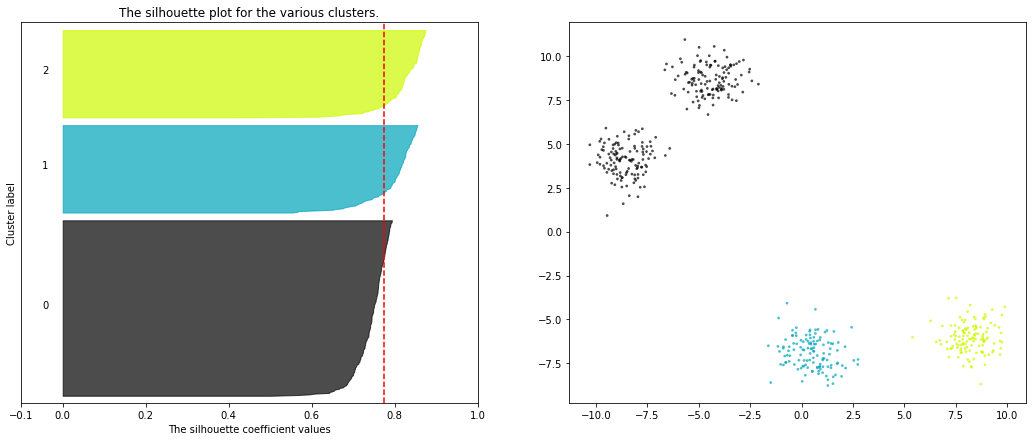

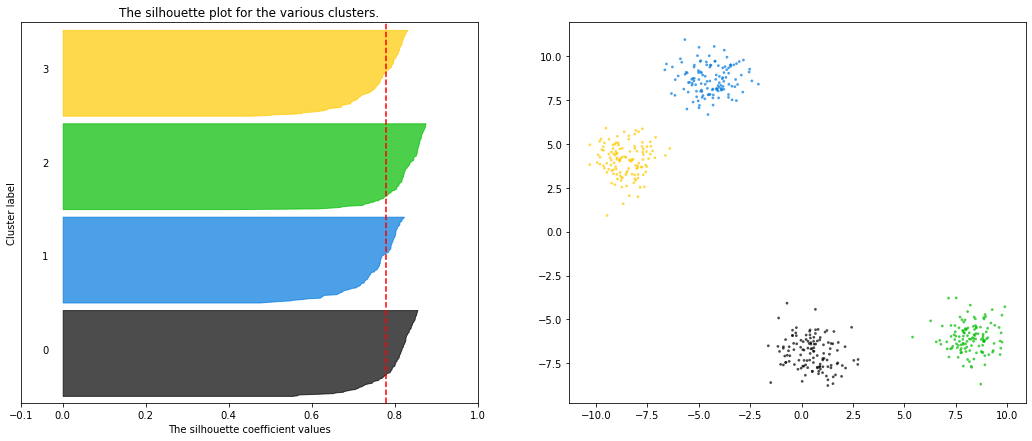

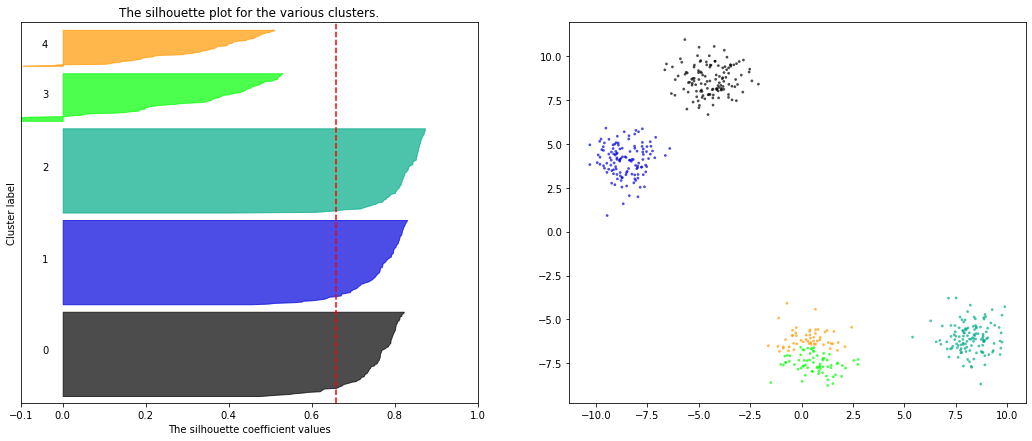

In [15]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np


range_n_clusters = [3,4,5]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.

    clusterer = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    
plt.show()